In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import itertools
from adjustText import adjust_text
import json

# Main plot

In [2]:
rsa = pd.read_csv('../../data/final/rsa.csv')
rsa

,name_i,name_j,spearman_local,n_words
0,eye_tracking,SVD_sim_rel,0.005722,1906
1,eye_tracking,SGSoftMaxInput_SWOW,0.030831,4041
2,eye_tracking,fastText_Wiki_News,0.088813,4038
3,eye_tracking,fastTextSub_OpenSub,0.039453,4013
4,eye_tracking,feature_overlap,0.114777,1994
...,...,...,...,...
291,EEG_text,fastText_CommonCrawl,0.051000,2092
292,EEG_text,spherical_text_Wikipedia,0.115955,2089
294,LexVec_CommonCrawl,fastText_CommonCrawl,0.603072,11512
295,LexVec_CommonCrawl,spherical_text_Wikipedia,0.487862,11442


In [3]:
with open('../../data/raw/dtype_to_embed.json', 'r') as f:
    dtype_to_embed = json.load(f)

text_names = dtype_to_embed['text']
brain_names = dtype_to_embed['brain']
behavior_names = dtype_to_embed['behavior']

# Text clustering
print(f'Within-text mean correlation {rsa.query("name_i in @text_names & name_j in @text_names").spearman_local.mean().round(2)}')
print(f'Text-other mean correlation {rsa.query("name_i in @text_names & name_j not in @text_names").spearman_local.mean().round(2)}')
print('---------------')

# Brain clustering
print(f'Within-brain mean correlation {rsa.query("name_i in @brain_names & name_j in @brain_names").spearman_local.mean().round(2)}')
print(f'Brain-other mean correlation {rsa.query("name_i in @brain_names & name_j not in @brain_names").spearman_local.mean().round(2)}')
print('---------------')

# Behavior clustering
print(f'Within-behavior mean correlation {rsa.query("name_i in @behavior_names & name_j in @behavior_names").spearman_local.mean().round(2)}')
print(f'Behavior-other mean correlation {rsa.query("name_i in @behavior_names & name_j not in @behavior_names").spearman_local.mean().round(2)}')
print('---------------')

Within-text mean correlation 0.48
Text-other mean correlation 0.16
---------------
Within-brain mean correlation 0.15
Brain-other mean correlation 0.07
---------------
Within-behavior mean correlation 0.21
Behavior-other mean correlation 0.14
---------------


In [4]:
def to_heat_df(results, col):
    # Heat df template
    names = list(pd.concat([results['name_i'], results['name_j']]).unique()) # needed because not all models guaranteed on one column
    heat_df = pd.DataFrame(index=names, columns=names)

    # Filling with correlations
    query = '(name_i == @name_i & name_j == @name_j) | (name_i == @name_j & name_j == @name_i)'
    for name_i, name_j in list(itertools.combinations(names, 2)):
        r, *_ = results.query(query)[col]
        heat_df.loc[name_i, name_j] = r
        heat_df.loc[name_j, name_i] = r
        
        order = text_names + brain_names + behavior_names

    return heat_df.loc[order, order].astype(float)


spearmans = to_heat_df(rsa, 'spearman_local')
spearmans

,CBOW_GoogleNews,fastText_CommonCrawl,fastText_Wiki_News,fastTextSub_OpenSub,GloVe_CommonCrawl,GloVe_Twitter,GloVe_Wikipedia,LexVec_CommonCrawl,morphoNLM,spherical_text_Wikipedia,...,fMRI_speech_hyper_align,fMRI_text_hyper_align,PPMI_SVD_SWOW,SGSoftMaxInput_SWOW,SGSoftMaxOutput_SWOW,ppmi_svd_south_florida,THINGS,feature_overlap,norms_sensorimotor,SVD_sim_rel
CBOW_GoogleNews,NaN,0.684027,0.540291,0.533954,0.549426,0.279131,0.532287,0.546083,0.327614,0.493723,...,0.107926,0.137933,0.284397,0.258572,-0.011739,0.117903,0.375274,0.418736,0.085359,0.050294
fastText_CommonCrawl,0.684027,NaN,0.656914,0.583852,0.613991,0.317046,0.499055,0.603072,0.348903,0.510124,...,0.109320,0.125333,0.339105,0.299973,-0.001460,0.140260,0.338795,0.468211,0.118625,0.053413
fastText_Wiki_News,0.540291,0.656914,NaN,0.462595,0.580178,0.414264,0.511457,0.455627,0.331666,0.529071,...,0.111623,0.141858,0.300384,0.242169,-0.232470,0.119580,0.286135,0.403864,0.152171,0.048662
fastTextSub_OpenSub,0.533954,0.583852,0.462595,NaN,0.483386,0.296051,0.431483,0.469074,0.316584,0.466979,...,0.075966,0.113234,0.315581,0.284567,-0.007952,0.131515,0.400376,0.424081,0.142780,0.047492
GloVe_CommonCrawl,0.549426,0.613991,0.580178,0.483386,NaN,0.593956,0.692083,0.658961,0.378360,0.626152,...,0.157933,0.222102,0.347311,0.283163,-0.199158,0.135158,0.430696,0.439933,0.209713,0.043875
GloVe_Twitter,0.279131,0.317046,0.414264,0.296051,0.593956,NaN,0.492754,0.382467,0.220470,0.426513,...,0.188351,0.259018,0.253319,0.189499,-0.227031,0.101355,0.290137,0.263299,0.156242,0.030933
GloVe_Wikipedia,0.532287,0.499055,0.511457,0.431483,0.692083,0.492754,NaN,0.518533,0.357036,0.599408,...,0.182936,0.251452,0.293354,0.248169,-0.097338,0.117018,0.338898,0.387490,0.141899,0.038790
LexVec_CommonCrawl,0.546083,0.603072,0.455627,0.469074,0.658961,0.382467,0.518533,NaN,0.328121,0.487862,...,0.128250,0.170709,0.320039,0.280590,0.010041,0.136931,0.417298,0.449622,0.170406,0.047859
morphoNLM,0.327614,0.348903,0.331666,0.316584,0.378360,0.220470,0.357036,0.328121,NaN,0.404738,...,0.000116,-0.023230,0.227780,0.196195,-0.023606,0.088593,0.285771,0.265006,0.120246,0.043148
spherical_text_Wikipedia,0.493723,0.510124,0.529071,0.466979,0.626152,0.426513,0.599408,0.487862,0.404738,NaN,...,0.126385,0.165845,0.329185,0.275216,-0.211947,0.126376,0.414181,0.396563,0.163840,0.046268


In [5]:
dissimilarity = 1 - spearmans
np.fill_diagonal(dissimilarity.values, 0.0)

# MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=2)
spearmans_2d = mds.fit_transform(dissimilarity)
spearmans_2d = pd.DataFrame(spearmans_2d, index=spearmans.index)

def data_type(mod_name):
    if mod_name in brain_names:
        return 'brain'
    elif mod_name in behavior_names:
        return 'behavior'
    else:
        return 'text'

# Adding data type
spearmans_2d['embed_type'] = [data_type(name) for name in spearmans_2d.index]
spearmans_2d

/Users/zhussain/opt/anaconda3/envs/PsychEmbeddings/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,0,1,embed_type
CBOW_GoogleNews,-0.335775,-0.341182,text
fastText_CommonCrawl,-0.220221,-0.203016,text
fastText_Wiki_News,0.029557,-0.216685,text
fastTextSub_OpenSub,-0.340129,-0.050251,text
GloVe_CommonCrawl,-0.073833,-0.289518,text
GloVe_Twitter,0.143095,-0.485514,text
GloVe_Wikipedia,-0.035106,-0.403139,text
LexVec_CommonCrawl,-0.324891,-0.193857,text
morphoNLM,-0.615121,-0.232477,text
spherical_text_Wikipedia,-0.176901,-0.444919,text


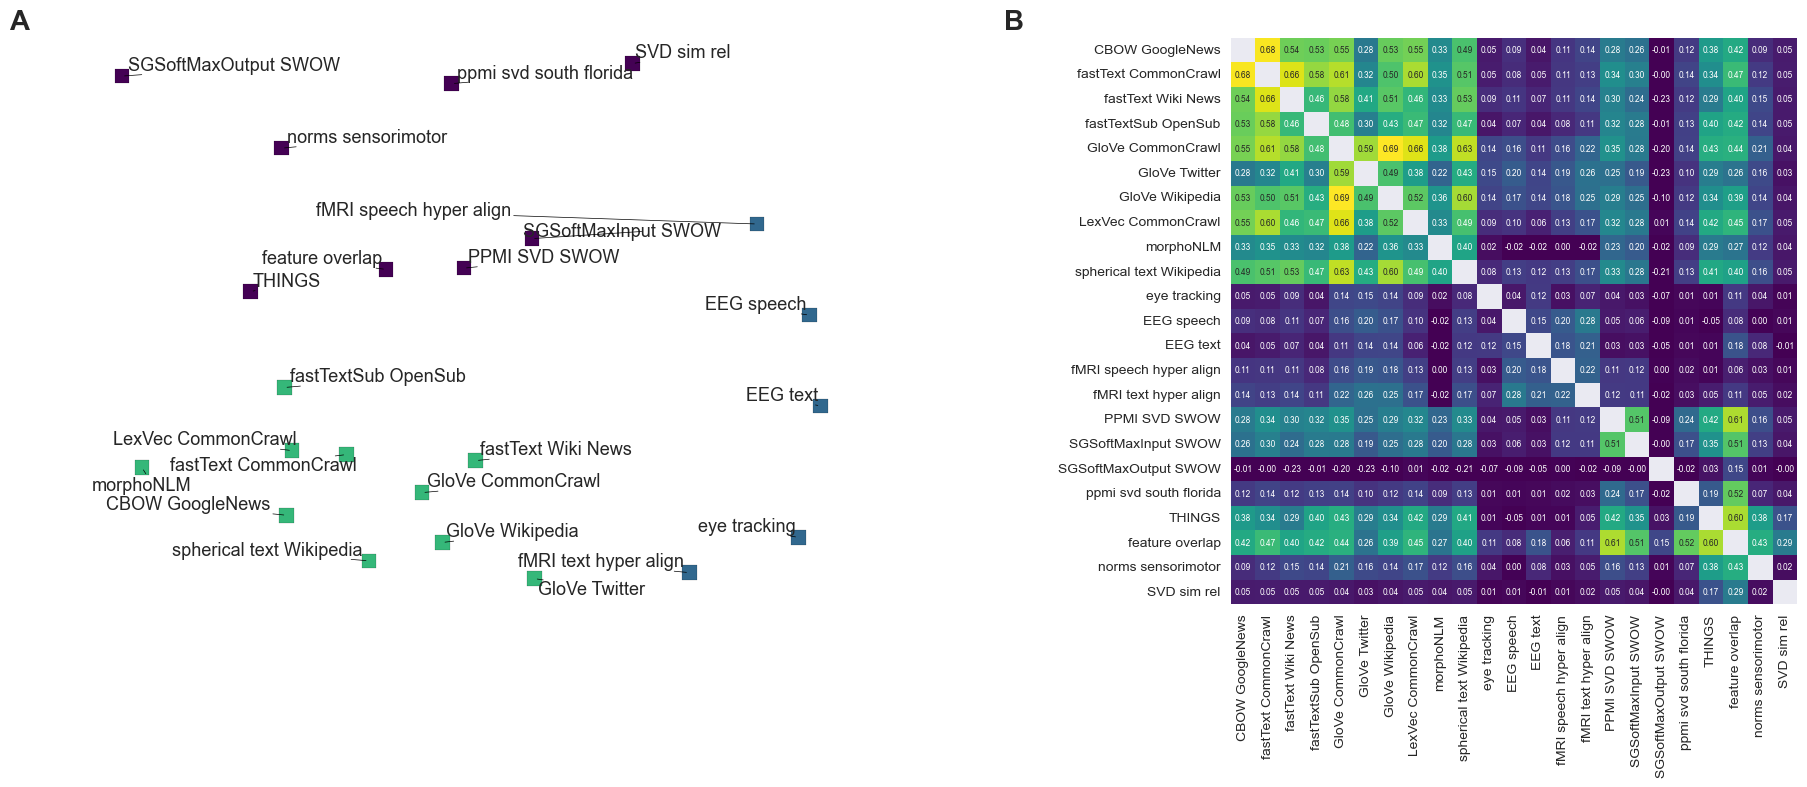

In [6]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(20, 8), width_ratios=(0.8, 1))

# MDS
cmap = plt.get_cmap('viridis', 4)
embed_type_to_color = {
    'brain': cmap(1),
    'behavior': cmap(0),
    'text': cmap(2)
}

sns.scatterplot(
    data=spearmans_2d, x=0, y=1, hue='embed_type',
    sizes=(500, 500), legend=False, s=110,
    marker='s', linewidth=0.1, edgecolor='black',
    palette=embed_type_to_color, ax=ax_1
)

ax_1.set(xticklabels='', yticklabels='', xlabel='', ylabel='')

texts = []
for model in spearmans.index:
    texts.append(
        ax_1.text(spearmans_2d[0][model], spearmans_2d[1][model], model.replace('_', ' '), fontsize=13)
    )

# Adjust text labels to avoid overlap
adjust_text(
    texts, arrowprops=dict(arrowstyle='-', color='black', lw=.5), ax=ax_1
)
ax_1.axis('off') # Turn off the axis

# Heatmap 
spearmans.index = spearmans.index.str.replace('_', ' ')
spearmans.columns = spearmans.columns.str.replace('_', ' ')
sns.heatmap(
    spearmans, square=True, annot=True, cmap='viridis',
    vmin=0, vmax=spearmans.max().max(), 
    fmt='.2f', annot_kws={"fontsize": 6}, cbar=False, ax=ax_2
)

# Adding bold panel labels
ax_1.text(-0.1, 1.05, 'A', transform=ax_1.transAxes, fontsize=20, fontweight='bold', va='top')
ax_2.text(-0.4, 1.05, 'B', transform=ax_2.transAxes, fontsize=20, fontweight='bold', va='top')

fig.tight_layout()
plt.savefig('../../figures/rsa.png', dpi=300, bbox_inches='tight')